<div align="center">
  <h1><b> Quantum Computing </b></h1>
  <h2> Measurement in a Different Basis </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [From the $Z$-basis to the $X$-basis](#from-the-z-basis-to-the-x-basis)
- [From the $Z$-basis to the $Y$-basis](#from-the-z-basis-to-the-y-basis)
- [Quantum Circuit for Measurement in a Different Basis](#quantum-circuit-for-measurement-in-a-different-basis) 
    - Measurement in the $𝑍$-basis
    - Measurement in the $X$-basis
    - Measurement in the $Y$-basis
    - Measurement in the Bell-basis

# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [1]:
%run implementations.ipynb

{'commit_hash': '786b192',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qc-qiskit/lib/python3.11/site-packages/IPython',
 'ipython_version': '9.7.0',
 'os_name': 'posix',
 'platform': 'Linux-6.8.0-87-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qc-qiskit/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.11.0 | packaged by conda-forge | (main, Jan 14 2023, '
                '12:27:40) [GCC 11.3.0]'}


# From the $Z$-basis to the $X$-basis

To change from the $Z$-basis to the $X$-basis one applies a Hadamard gate:

\begin{eqnarray}
H|0\rangle &=& \frac{1}{\sqrt{2}}\Big(|0\rangle+|1\rangle\Big) = R_y(\pi/2)|0\rangle = |+\rangle.\\
H|1\rangle &=& \frac{1}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big) = R_y(-\pi/2)|0\rangle = |-\rangle.
\end{eqnarray}

\begin{eqnarray}
\langle +| &=& (|+\rangle)^{\dagger} = (H|0\rangle)^{\dagger} = (|0\rangle)^{\dagger}H^{\dagger} = \langle 0|H,\\
\langle -| &=& (|-\rangle)^{\dagger} = (H|1\rangle)^{\dagger} = (|1\rangle)^{\dagger}H^{\dagger} = \langle 1|H.
\end{eqnarray}

## Verifying $H|0\rangle = R_y(\pi/2)|0\rangle = |+\rangle$

### **Matrix approach:**

$$H |0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1*1 + 1*0 \\ 1*1 -1*0 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} =  \frac{1}{\sqrt{2}} \Bigg( \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} \Bigg) = \frac{1}{\sqrt{2}}\Big(|0\rangle+|1\rangle\Big) \equiv |+\rangle.$$

\begin{eqnarray}
R_y(\theta) \doteq \exp(-iY\theta/2) =  
\begin{bmatrix} cos(\theta/2) & -sin(\theta/2) \\ sin(\theta/2) & cos(\theta/2) \end{bmatrix}.
\end{eqnarray}

\begin{eqnarray}
R_y(\pi/2)|0\rangle &=&  
\begin{bmatrix} 
cos(\pi/4) & -sin(\pi/4) \\ sin(\pi/4) & cos(\pi/4) \end{bmatrix} \begin{bmatrix} 1 \\ 0 
\end{bmatrix}
=
\begin{bmatrix} 
cos(\pi/4) \\ sin(\pi/4) 
\end{bmatrix}\\
&=& \frac{1}{\sqrt(2)} 
\begin{bmatrix} 
1 \\ 1 
\end{bmatrix}
= |+\rangle.
\end{eqnarray}

One should note that $sin(\pi/4) = cos(\pi/4) = \frac{1}{\sqrt{2}}$.


In [2]:
# sine(pi/4) = cosine(pi/4)
np.sin(np.pi/4).round(9)  == np.cos(np.pi/4).round(9)

True

In [3]:
# sine(pi/4) = 1/sqrt(2)
np.sin(np.pi/4).round(9) == (1/np.sqrt(2)).round(9)

True

### **Verifying with NumPy:**

In [4]:
zero = np.array([[1,0]]).T # |0>.
one = np.array([[0,1]]).T  # |1>.

In [5]:
had@zero # H|0>.

array([[0.70710678],
       [0.70710678]])

In [6]:
ry_pi2@zero # RY(pi/2)|0>.

array([[0.70710678],
       [0.70710678]])

### **Verifying with Qiskit:**

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


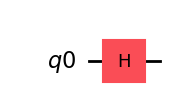

In [7]:
sim = Aer.get_backend('aer_simulator')  # Define the simulator.

qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.h(0)  # Apply the Hadamard gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


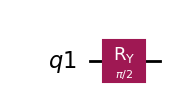

In [8]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.ry(np.pi/2,0)  # Apply the RY(pi/2) gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

## Verifying $H|1\rangle = R_y(-\pi/2)|0\rangle = |-\rangle$

### **Matrix approach**

$$H |1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1*0 + 1*1 \\ 1*0 -1*1 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} =  \frac{1}{\sqrt{2}} \Bigg( \begin{bmatrix} 1 \\ 0 \end{bmatrix} - \begin{bmatrix} 0 \\ 1 \end{bmatrix} \Bigg) = \frac{1}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big) \equiv |-\rangle.$$

\begin{eqnarray}
R_y(\theta) \doteq \exp(-iY\theta/2) =  
\begin{bmatrix} cos(\theta/2) & -sin(\theta/2) \\ sin(\theta/2) & cos(\theta/2) \end{bmatrix}.
\end{eqnarray}

\begin{eqnarray}
R_y(-\pi/2)|0\rangle &=&  
\begin{bmatrix} 
cos(-\pi/4) & -sin(-\pi/4) \\ sin(-\pi/4) & cos(-\pi/4) \end{bmatrix} \begin{bmatrix} 1 \\ 0 
\end{bmatrix}
=
\begin{bmatrix} 
cos(-\pi/4) \\ sin(-\pi/4) 
\end{bmatrix}\\
&=&\begin{bmatrix} 
cos(\pi/4) \\ -sin(\pi/4) 
\end{bmatrix}
= \frac{1}{\sqrt(2)} 
\begin{bmatrix} 
1 \\ -1 
\end{bmatrix}
= |-\rangle.
\end{eqnarray}

One should note that cosine is an even function, $cos(-x)=cos(x)$, and sine is an odd function, $sin(-x) = -sin(x)$. Moreover, $sin(\pi/4) = cos(\pi/4)=\frac{1}{\sqrt{2}}$.


In [9]:
# sine(pi/4) = cosine(pi/4)
np.sin(np.pi/4).round(9)  == np.cos(np.pi/4).round(9)

True

### **Verifying with NumPy:**

In [10]:
had@one # H|1>.

array([[ 0.70710678],
       [-0.70710678]])

In [11]:
ry_mpi2@zero # RY(-pi/2)|0>.

array([[ 0.70710678],
       [-0.70710678]])

### **Verifying with Qiskit:**

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


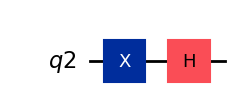

In [12]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.x(0)  # Apply the Pauli-X gate on qubit 0.
qc.h(0)  # Apply the Hadamard gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


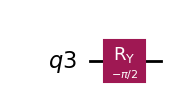

In [13]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.ry(-np.pi/2,0)  # Apply the RY(-pi/2) gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

# From the $Z$-basis to the $Y$-basis

Recall that:

$$S = P(\lambda = \pi/2) = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}.$$

$$S^{\dagger} = P^{\dagger}(\lambda = \pi/2) = \begin{bmatrix} 1 & 0 \\ 0 & -i \end{bmatrix}.$$

And the action in the $\{|0\rangle, |1\rangle \}$ basis is:

$$S|0\rangle = |0\rangle.$$
$$S^{\dagger}|0\rangle = |0\rangle.$$
$$S|1\rangle = e^{i\pi/2}|1\rangle = i|1\rangle.$$
$$S^{\dagger}|1\rangle = e^{-i\pi/2}|1\rangle = -i|1\rangle.$$

To change from the $Z$-basis to the $Y$-basis one applies the Hadamard gate $H$ followed by the phase gate $S$:

\begin{eqnarray}
SH|0\rangle &=& S|+\rangle = \frac{1}{\sqrt{2}}\Big(S|0\rangle+S|1\rangle\Big) = \frac{1}{\sqrt{2}}\Big(|0\rangle+i|1\rangle\Big) = R_x(-\pi/2)|0\rangle = |\oplus\rangle.\\
SH|1\rangle &=&  S|-\rangle = \frac{1}{\sqrt{2}}\Big(S|0\rangle-S|1\rangle\Big) = \frac{1}{\sqrt{2}}\Big(|0\rangle-i|1\rangle\Big) = R_x(\pi/2)|0\rangle = |\ominus\rangle.
\end{eqnarray}

\begin{eqnarray}
\langle \oplus| &=& (|\oplus\rangle)^{\dagger} = (SH|0\rangle)^{\dagger} = (|0\rangle)^{\dagger} (SH)^{\dagger} = \langle 0| H^{\dagger}S^{\dagger}=\langle 0|HS^{\dagger},\\
\langle \ominus| &=& (|\ominus\rangle)^{\dagger} = (SH|1\rangle)^{\dagger} = (|1\rangle)^{\dagger} (SH)^{\dagger} = \langle 1| H^{\dagger}S^{\dagger}=\langle 1|HS^{\dagger}.
\end{eqnarray}

## Verifying $SH|0\rangle = R_x(-\pi/2)|0\rangle = |\oplus\rangle$

### Verifying with NumPy

Here, ket vectors $|0 \rangle$ and $|1\rangle$ will be represented using 1-D numpy arrays:

In [14]:
zero = np.array([1,0]) # 1-D NumPy array representing the state |0>.
one = np.array([0,1])  # 1-D NumPy array representing the state |1>.

zero.shape, one.shape

((2,), (2,))

In [15]:
(phase_s@had)@zero # SH|0>.

array([0.70710678+0.j        , 0.        +0.70710678j])

In [16]:
rx_mpi2@zero # RX(-pi/2)|0>.

array([0.70710678+0.j        , 0.        +0.70710678j])

Here, ket vectors $|0 \rangle$ and $|1\rangle$ will be represented using 2-D numpy arrays:

In [17]:
zero = np.array([[1,0]]).T # 2-D NumPy array representing the state |0>.
one = np.array([[0,1]]).T  # 2-D NumPy array representing the state |1>.

zero.shape, one.shape

((2, 1), (2, 1))

In [18]:
(phase_s@had)@zero # SH|0>.

array([[0.70710678+0.j        ],
       [0.        +0.70710678j]])

In [19]:
rx_mpi2@zero # RX(-pi/2)|0>.

array([[0.70710678+0.j        ],
       [0.        +0.70710678j]])

### Verifying with Qiskit

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


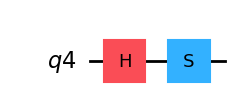

In [20]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.h(0)  # Apply the Hadamard gate on qubit 0.
qc.s(0)  # Apply the S gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


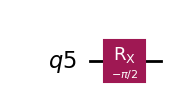

In [21]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.rx(-np.pi/2,0)  # Apply the RX(-pi/2) gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

## Verifying $SH|1\rangle = R_x(\pi/2)|0\rangle = |\ominus\rangle$

### Verifying with NumPy

In [22]:
(phase_s@had)@one # SH|1>.

array([[0.70710678+0.j        ],
       [0.        -0.70710678j]])

In [23]:
rx_pi2@zero # RX(pi/2)|0>.

array([[0.70710678+0.j        ],
       [0.        -0.70710678j]])

### Verifying with Qiskit

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


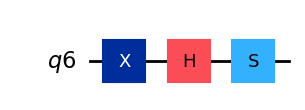

In [24]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.x(0)  # Apply the Pauli-X gate on qubit 0.
qc.h(0)  # Apply the Hadamard gate on qubit 0.
qc.s(0)  # Apply the S gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl') 

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


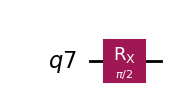

In [25]:
qr = QuantumRegister(1)  # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)
qc.rx(np.pi/2,0)  # Apply the RX(-pi/2) gate on qubit 0.
print(Statevector.from_instruction(qc))
qc.draw(output='mpl')  

# Quantum Circuit for Measurement in a Different Basis

Measurements in a quantum computer are often computed in the $Z$-basis. To perform a measurement in a different basis, a basis change must by applied.

The following sections showcase how to perform a measurement in a different basis.

In [26]:
# 1D numpy array representing the classical state |1>:

initial_state = np.array([0,1]) 
initial_state.ndim, initial_state.shape

(1, (2,))

## Measurement in the $Z$-basis

Consider a quantum system in the state $|\psi\rangle=|1\rangle$. A measurement in the $Z$-basis $\{|0\rangle, |1\rangle \}$ will be deterministic: 

$$Pr(|1\rangle)=|\langle 1|\psi \rangle|^2=|\langle 1|1 \rangle|^2=\delta_{11}=1=100\%.$$

$$Pr(|0\rangle)=|\langle 0|\psi \rangle|^2=|\langle 0|1 \rangle|^2=\delta_{10}=0\%.$$

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


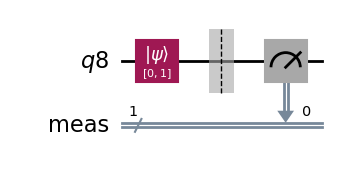

In [27]:
# Measurement in the Z-basis:

qr = QuantumRegister(1)      # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)      # Create the circuit.
qc.initialize(initial_state) # Preparing the state to be measured.
print(Statevector.from_instruction(qc)) # Statevector before measurement.
qc.measure_all()
qc.draw(output='mpl')  

In [28]:
backend = Aer.get_backend('statevector_simulator')
num_of_measurements = 1024

job = backend.run(qc, shots=num_of_measurements)
result = job.result()
state = result.get_statevector()
counts = result.get_counts()
print("State after measurement:", state)
print("Measurement results:", counts)

State after measurement: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Measurement results: {'1': 1024}


## Measurement in the $X$-basis

Consider a quantum system in the state $|\psi\rangle=|1\rangle$. A measurement in the $X$-basis $\{|+\rangle, |-\rangle \}$ will be probabilistic: 
    
$$Pr(|+\rangle)=|\langle +|\psi \rangle|^2=|\langle 0|H|\psi \rangle|^2=|\langle 0|H|1 \rangle|^2=|\langle 0|\frac{1}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big)|^2=\left|\frac{1}{\sqrt{2}}\right|^2=1/2=50\%.$$    

$$Pr(|-\rangle)=|\langle -|\psi \rangle|^2=|\langle 1|H|\psi \rangle|^2=|\langle 1|H|1 \rangle|^2=|\langle 1|\frac{1}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big)|^2=\left|\frac{-1}{\sqrt{2}}\right|^2=1/2=50\%.$$ 

Recall that $H|1\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big).$

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


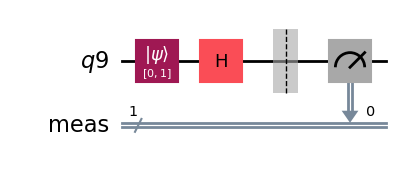

In [29]:
# Measurement in the X-basis:

qr = QuantumRegister(1)   # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)   # Create the circuit.
qc.initialize(initial_state) # Preparing the state to be measured.
qc.h(0)                      # Apply a Hadamard gate H to measure in the X-basis.
print(Statevector.from_instruction(qc)) # Statevector before measurement.
qc.measure_all()
qc.draw(output='mpl')  

In [30]:
backend = Aer.get_backend('statevector_simulator')
num_of_measurements = 1024

job = backend.run(qc, shots=num_of_measurements)
result = job.result()
state = result.get_statevector()
counts = result.get_counts()
print("State after measurement:", state)
print("Measurement results:", counts) # Probability distribution.

State after measurement: Statevector([ 1.-1.2246468e-16j, -0.+0.0000000e+00j],
            dims=(2,))
Measurement results: {'1': 514, '0': 510}


## Measurement in the $Y$-basis

Consider a quantum system in the state $|\psi\rangle=|1\rangle$. A measurement in the $Y$-basis $\{|\oplus\rangle, |\ominus\rangle \}$ will be probabilistic: 
    
$$Pr(|\oplus\rangle)=|\langle \oplus|\psi \rangle|^2=|\langle 0|HS^{\dagger}|\psi \rangle|^2=|\langle 0|HS^{\dagger}|1 \rangle|^2=|\langle 0|\frac{-i}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big)|^2=\left|\frac{-i}{\sqrt{2}}\right|^2=1/2=50\%.$$    

$$Pr(|\ominus\rangle)=|\langle \ominus|\psi \rangle|^2=|\langle 1|HS^{\dagger}|\psi \rangle|^2=|\langle 1|HS^{\dagger}|1 \rangle|^2=|\langle 1|\frac{-i}{\sqrt{2}}\Big(|0\rangle-|1\rangle\Big)|^2=\left|\frac{i}{\sqrt{2}}\right|^2=1/2=50\%.$$ 

Recall that:

$$S^{\dagger}|1\rangle = e^{-i\pi/2}|1\rangle = -i|1\rangle.$$

In [31]:
had = 1/np.sqrt(2)*np.array([[1, 1],[1, -1]])
S_dagger = np.array([[1, 0],[0, -1j]])
one = np.array([[0],[1]])
had@S_dagger@one # Statevector before the measurement.

array([[0.-0.70710678j],
       [0.+0.70710678j]])

In [32]:
(S_dagger@one == -1j*one).all()

True

In [33]:
(had@S_dagger@one == -1j*had@one).all()

True

Statevector([0.-0.70710678j, 0.+0.70710678j],
            dims=(2,))


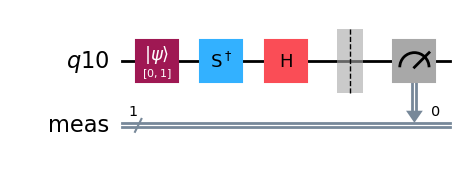

In [34]:
# Measurement in the Y-basis:

qr = QuantumRegister(1)   # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr)   # Create the circuit.
qc.initialize(initial_state) # Preparing the state to be measured.
qc.sdg(0), qc.h(0)           # Apply the conjugate transpose of the Phase gate S and the Hadamard gate H to measure in the Y-basis.
print(Statevector.from_instruction(qc)) # Statevector before measurement.
qc.measure_all()
qc.draw(output='mpl')  

In [35]:
backend = Aer.get_backend('statevector_simulator')
num_of_measurements = 1024

job = backend.run(qc, shots=num_of_measurements)
result = job.result()
state = result.get_statevector()
counts = result.get_counts()
print("State after measurement:", state)
print("Measurement results:", counts) # Probability distribution.

State after measurement: Statevector([0.0000000e+00-0.j, 1.2246468e-16+1.j],
            dims=(2,))
Measurement results: {'0': 517, '1': 507}


# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 